# Lab 01
Họ tên: Tăng Gia Hân

MSSV: 22520394

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data pre-processing

In [3]:
data = pd.read_csv('/content/drive/MyDrive/DS102/BTTH1/forest+fires/forestfires.csv')
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
data['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [7]:
def convert_month(month: str) -> int:
  month_dict = {
      "jan": 1,
      "feb": 2,
      "mar": 3,
      "apr": 4,
      "may": 5,
      "jun": 6,
      "jul": 7,
      "aug": 8,
      "sep": 9,
      "oct": 10,
      "nov": 11,
      "dec": 12,
  }
  return month_dict[month]

In [8]:
data['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [9]:
def convert_day(day: str) -> int:
  day_dict = {
      "sun": 0,
      "mon": 1,
      "tue": 2,
      "wed": 3,
      "thu": 4,
      "fri": 5,
      "sat": 6,
  }
  return day_dict[day]

In [10]:
data["month"] = data["month"].apply(convert_month)
data["day"] = data["day"].apply(convert_day)

In [11]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [12]:
class LinearRegressionModel:
  def rmse(self, y: np.ndarray, y_hat: np.ndarray) -> float:
    delta = y - y_hat
    return np.sqrt(np.mean(delta ** 2))

  def fit(self, X: np.ndarray, y: np.ndarray) -> None:
    cov = np.matmul(X.T, X)
    inv_cov = np.linalg.pinv(cov)
    self.theta_: np.ndarray = inv_cov.dot(X.T).dot(y)

  def predict(self, X: np.ndarray) -> np.ndarray:
    y_pred = np.matmul(self.theta_.T, X.T)
    return y_pred

# Defining the input and output vector

In [13]:
from typing import Tuple

def split_data(data: np.ndarray, target_col: int = -1, train_ratio: float = 0.8) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
  N = data.shape[0]
  train_size = int(train_ratio * N)

  train_data, test_data = np.split(data, [train_size])

  X_train, X_test = train_data[:, :target_col], test_data[:, :target_col]
  y_train, y_test = train_data[:, target_col], test_data[:, target_col]

  return X_train, X_test, y_train, y_test


# Câu 1

In [14]:
X_train, X_test, y_train, y_test = split_data(data.to_numpy())

In [15]:
lr = LinearRegressionModel()
lr.fit(X_train, y_train)

In [16]:
lr.theta_

array([ 0.93387474, -0.3472708 ,  2.97274599,  1.69617548, -0.08518378,
        0.11686352, -0.02830015, -0.88678297,  0.43970684, -0.18297875,
        0.04626583, -6.54744483])

In [17]:
lr.theta_.shape

(12,)

In [18]:
y_pred = lr.predict(X_test)
rmse = lr.rmse(y_test, y_pred)
print("RMSE: ", rmse)

RMSE:  79.42477263962986


# Câu 2

In [19]:
df = data.copy()

In [20]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [21]:
for col in num_cols:
  if col not in ['month', 'day', 'area']:
    mean = df[col].mean()
    std = df[col].std()
    df[col] = (df[col] - mean) / std

In [22]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1.007337,0.569309,3,5,-0.805180,-1.322045,-1.828706,-0.860113,-1.840857,0.411326,1.497164,-0.073197,0.0
1,1.007337,-0.243765,10,2,-0.008094,-1.178399,0.488418,-0.509195,-0.153130,-0.691786,-1.740070,-0.073197,0.0
2,1.007337,-0.243765,10,6,-0.008094,-1.048806,0.560173,-0.509195,-0.738668,-0.691786,-1.516813,-0.073197,0.0
3,1.439531,1.382383,3,5,0.191177,-1.211188,-1.896429,-0.004751,-1.823636,3.230391,-0.009824,0.602572,0.0
4,1.439531,1.382383,3,0,-0.243597,-0.930142,-1.796859,0.126843,-1.289763,3.352959,-1.237741,-0.073197,0.0


In [23]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = split_data(df.to_numpy())

In [24]:
lr2 = LinearRegressionModel()
lr2.fit(X_train_scaled, y_train_scaled)

In [25]:
y_pred_scaled = lr2.predict(X_test_scaled)
rmse_scaled = lr2.rmse(y_test_scaled, y_pred_scaled)

In [26]:
print(f"RMSE without scaling: {rmse}")
print(f"RMSE with scaling: {rmse_scaled}")

RMSE without scaling: 79.42477263962986
RMSE with scaling: 79.39362106724447


**Kết luận**: Mô hình sau khi được huấn luyện với dữ liệu đã được chuẩn hoá cho kết quả tốt hơn

# Câu 3

In [27]:
df_corr = df.copy()

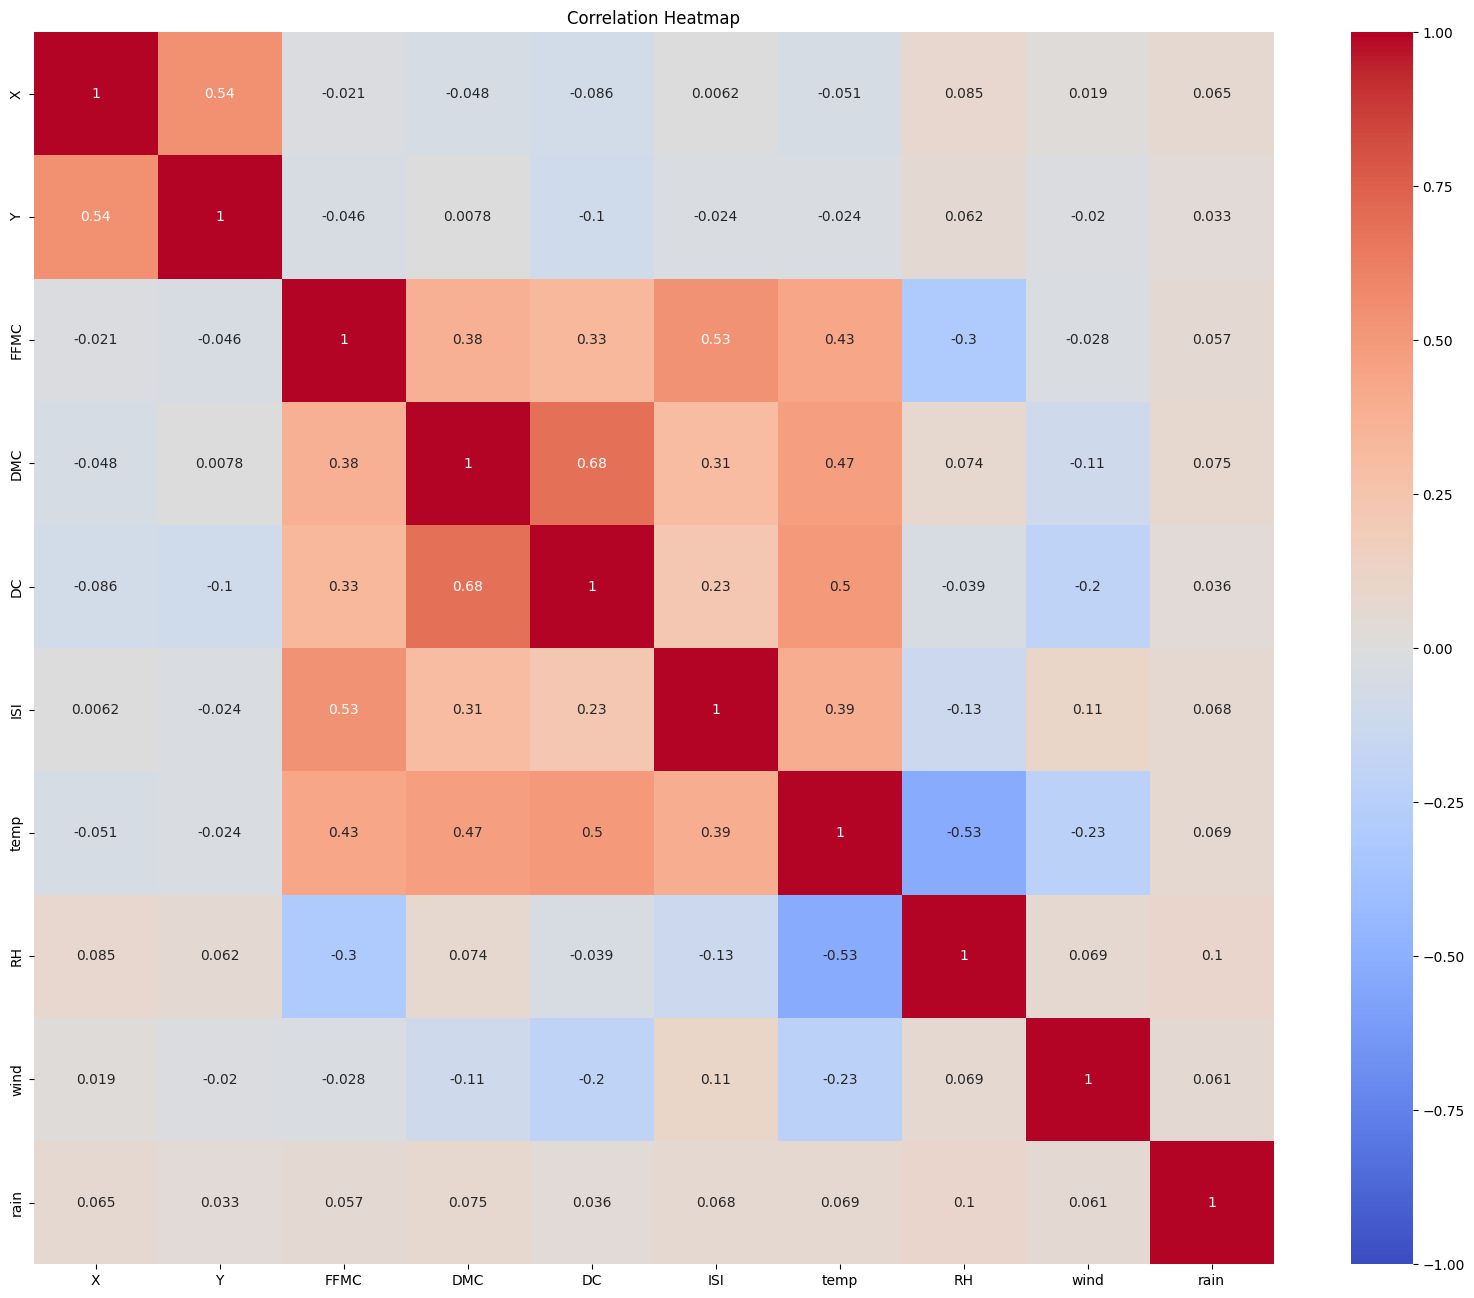

In [28]:
corr_matrix = df_corr.drop(columns=['area', 'month', 'day']).corr()
# Vẽ biểu đồ heatmap tương quan
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Dựa vào biểu đồ tương quan ta thấy DMC và DC có độ tương quan cao nhất (0.68)

Ta sẽ loại bỏ một trong hai thuộc tính DMC hoặc DC

In [29]:
df_corr.drop(columns=['DMC'], inplace=True)

In [30]:
X_train_new, X_test_new, y_train_new, y_test_new = split_data(df_corr.to_numpy())

In [31]:
lr3 = LinearRegressionModel()
lr3.fit(X_train_new, y_train_new)

In [32]:
y_pred_new = lr3.predict(X_test_new)
rmse_drop = lr3.rmse(y_test_new, y_pred_new)

In [33]:
print(f"RMSE without scaling: {rmse}")
print(f"RMSE with scaling: {rmse_scaled}")
print(f"RMSE drop DMC: {rmse_drop}")

RMSE without scaling: 79.42477263962986
RMSE with scaling: 79.39362106724447
RMSE drop DMC: 79.40337866706496


**Kết luận**: Việc bỏ bớt thuộc tính DMC không mang lại hiệu quả

# Câu 4

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [35]:
df_sk = data.copy()
df_sk.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [36]:
X = df_sk.drop('area', axis=1)
y = df_sk['area']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [38]:
model = LinearRegression()

In [39]:
model.fit(X_train, y_train)
y_pred_sk = model.predict(X_test)
rmse_sk = np.sqrt(mean_squared_error(y_test, y_pred_sk))
print(f"RMSE using sklearn: {rmse_sk}")

RMSE using sklearn: 79.42418341039725


**Kết luận**: Phương pháp p Linear Regression sử dụng thư viện Sklearn cho kết quả tương tự Câu 1.